Initial expressions and assumptions:

\begin{equation}
    C\left(\mathbf{X}, \beta\right) = \frac{1}{n} \sum_{i=0}^{n-1} \left(y_i - \tilde{y}_i\right)^2 = \mathbb{E} \left[ \left( \mathbf{y} - \mathbf{\tilde{y}} \right)^2 \right]
\end{equation}

\begin{equation}
    \mathbf{y} = f\left(\mathbf{x}\right) + \mathbf{\epsilon}
\end{equation}

Now, writing out the terms, 

\begin{align*}
    \mathbb{E} \left[ \left( \mathbf{y} - \mathbf{\tilde{y}} \right)^2 \right] 
    &= \mathbb{E} \left[\mathbf{y}^2 - 2\mathbf{y}\mathbf{\tilde{y}} + \mathbf{\tilde{y}}^2 \right] \\
    &= \mathbb{E} \left[\mathbf{y}^2\right] - 2\mathbb{E}\left[\mathbf{y}\mathbf{\tilde{y}}\right] + \mathbb{E} \left[ \mathbf{\tilde{y}}^2 \right]
\end{align*}

Term by term, and simplifying notation with $f = f\left(\mathbf{x}\right)$, we have that

\begin{align*}
    \mathbb{E} \left[\mathbf{y}^2\right] &= \mathbb{E} \left[ \left(f + \mathbf{\epsilon}\right)^2 \right] \\
    &= \mathbb{E} \left[f^2 +2f\epsilon + \epsilon^2 \right] \\
    &= \mathbb{E} \left[f^2\right] + 2\mathbb{E} \left[f\epsilon\right] + \mathbb{E} \left[\epsilon^2 \right]\\
    &= f^2 + f  \underbrace{\mathbb{E} \left[\epsilon \right]}_{=0} + \sigma^2 \\
    &= f^2 + \sigma^2
\end{align*}

\begin{align*}
    \mathbb{E}\left[\mathbf{y}\mathbf{\tilde{y}}\right] &= \mathbb{E} \left[ \left(f + \mathbf{\epsilon}\right)\mathbf{\tilde{y}} \right] \\
    &= \mathbb{E} \left[ f \mathbf{\tilde{y}} \right] + \mathbb{E} \left[ \epsilon \mathbf{\tilde{y}} \right] \\
    &= f\mathbb{E} \left[ \mathbf{\tilde{y}} \right] + \mathbb{E} \left[\mathbf{\tilde{y}}\right] \underbrace{\mathbb{E} \left[\epsilon\right]}_{=0} \\
    &= f\mathbb{E} \left[ \mathbf{\tilde{y}} \right]
\end{align*}

\begin{align*}
    \mathbb{E} \left[\tilde{\mathbf{y}}^2\right] = \rm Var\left[\tilde{\mathbf{y}} \right] + \mathbb{E} \left[\tilde{\mathbf{y}}\right] ^2
\end{align*}

where the last term is simply from the definition of variance, $\rm Var\left[\tilde{\mathbf{y}} \right] = \mathbb{E} \left[\tilde{\mathbf{y}}^2\right] - \mathbb{E} \left[\tilde{\mathbf{y}}\right] ^2$. Putting everything together, we get


\begin{align*}
    \mathbb{E} \left[ \left( \mathbf{y} - \mathbf{\tilde{y}} \right)^2 \right] &= f^2 + \sigma^2 -2f\mathbb{E} \left[ \mathbf{\tilde{y}} \right] + \rm Var\left[\tilde{\mathbf{y}} \right] + \mathbb{E} \left[\tilde{\mathbf{y}}\right] ^2 \\
    &= \left(f^2 -2f\mathbb{E} \left[ \mathbf{\tilde{y}} \right] + \mathbb{E} \left[\tilde{\mathbf{y}}\right] ^2 \right) + \rm Var\left[\tilde{\mathbf{y}} \right] + \sigma^2
\end{align*}

Looking at all the terms inside the paranthesis, we can see that since f is non-stochastic we have that 
\begin{equation}
    \left(f^2 -2f\mathbb{E} \left[ \mathbf{\tilde{y}} \right] + \mathbb{E} \left[\tilde{\mathbf{y}}\right] ^2 \right) = \mathbb{E} \left[\left(f^2 -2f\mathbb{E} \left[ \mathbf{\tilde{y}} \right] + \mathbb{E} \left[\tilde{\mathbf{y}}\right] ^2 \right) \right] = \mathbb{E} \left[\left(f - \mathbb{E} \left[\tilde{\mathbf{y}}\right] \right)^2 \right]
\end{equation}

and we are left with 

\begin{equation}
    \mathbb{E} \left[ \left( \mathbf{y} - \mathbf{\tilde{y}} \right)^2 \right] = \mathbb{E} \left[\left(f - \mathbb{E} \left[\tilde{\mathbf{y}}\right] \right)^2 \right] + \rm Var\left[\tilde{\mathbf{y}} \right] + \sigma^2
\end{equation}

If you are supposed so somehow get $\mathbf{y}$ instead of f, I would appreciate some clarification, since it seems to me you would then get an extra $\sigma^2$ term you can not get rid of.

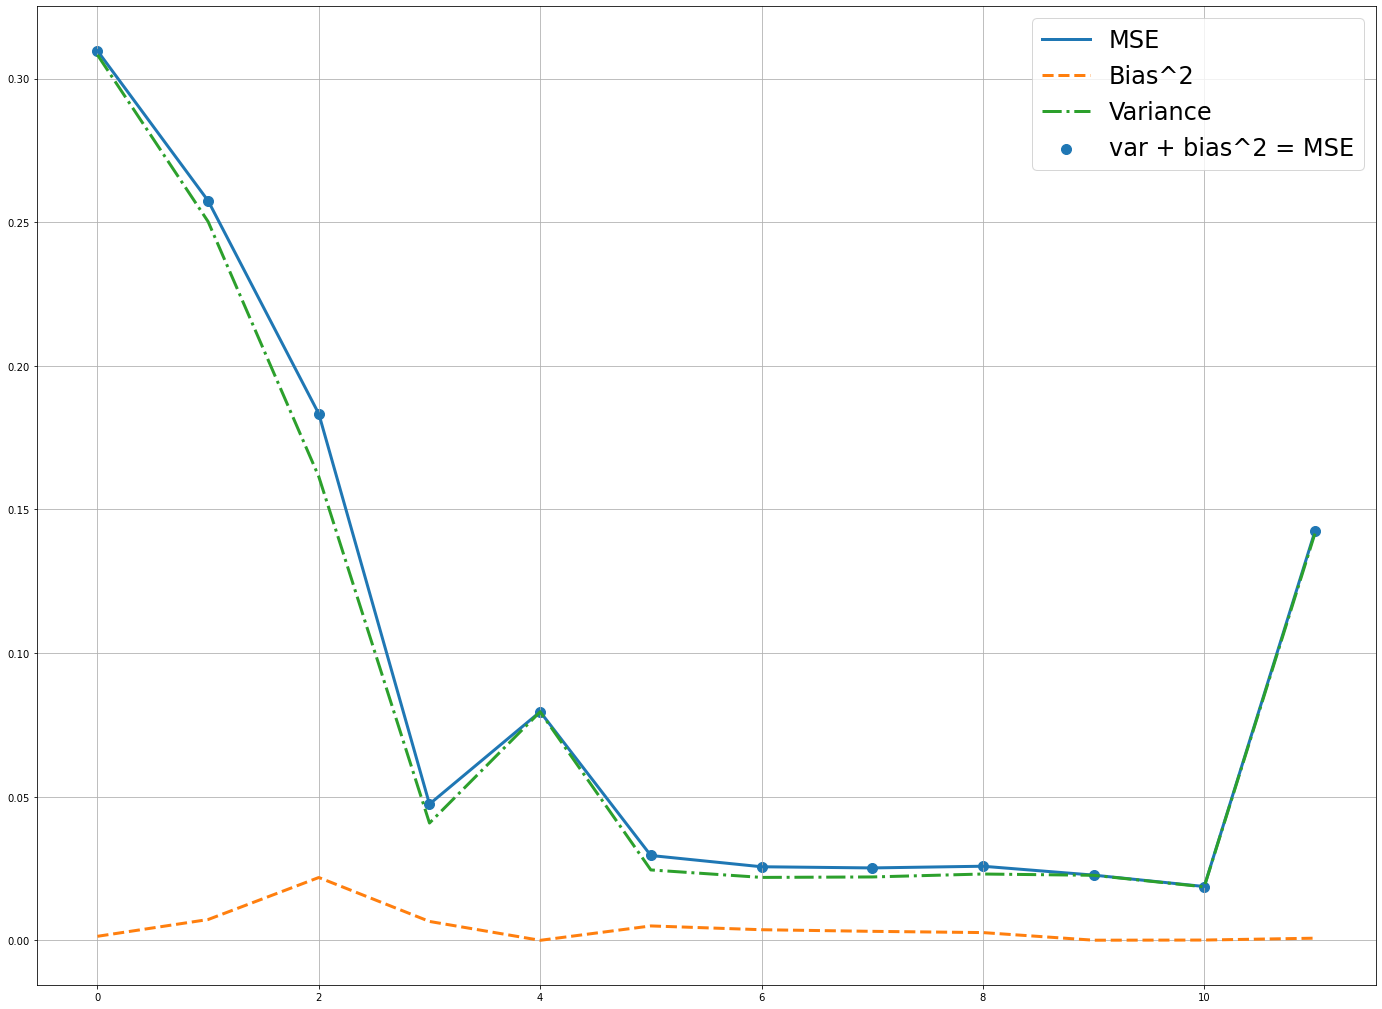

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(2023)
n = 100
noise_coeff = 0.1

#Generating data
x = np.linspace(-5, 5, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + noise_coeff * np.random.normal(0, 0.1, x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

p = 12
error = np.empty(p)
bias = np.empty(p)
variance = np.empty(p)
polyvec = np.empty(p)

for deg in range(p):
    # Create linear regression object
    regr = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression(fit_intercept=False))

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
    
    error[deg] = mean_squared_error(y_test, y_pred)
    bias[deg] = np.mean(y_test - y_pred)**2 #Right one?
    variance[deg] = np.var(y_test - y_pred)
    polyvec[deg] = deg
        

fig, ax = plt.subplots(figsize=(24,18))
ax.plot(polyvec, error, label='MSE', linewidth=3)
ax.plot(polyvec, bias, label='Bias^2', linestyle='dashed', linewidth=3)
ax.plot(polyvec, variance, label='Variance', linestyle='dashdot', linewidth=3)
ax.scatter(polyvec, bias + variance, label= "var + bias^2 = MSE", s=100)
ax.legend(fontsize=24)
ax.grid()
plt.show()

# With bootstrapping

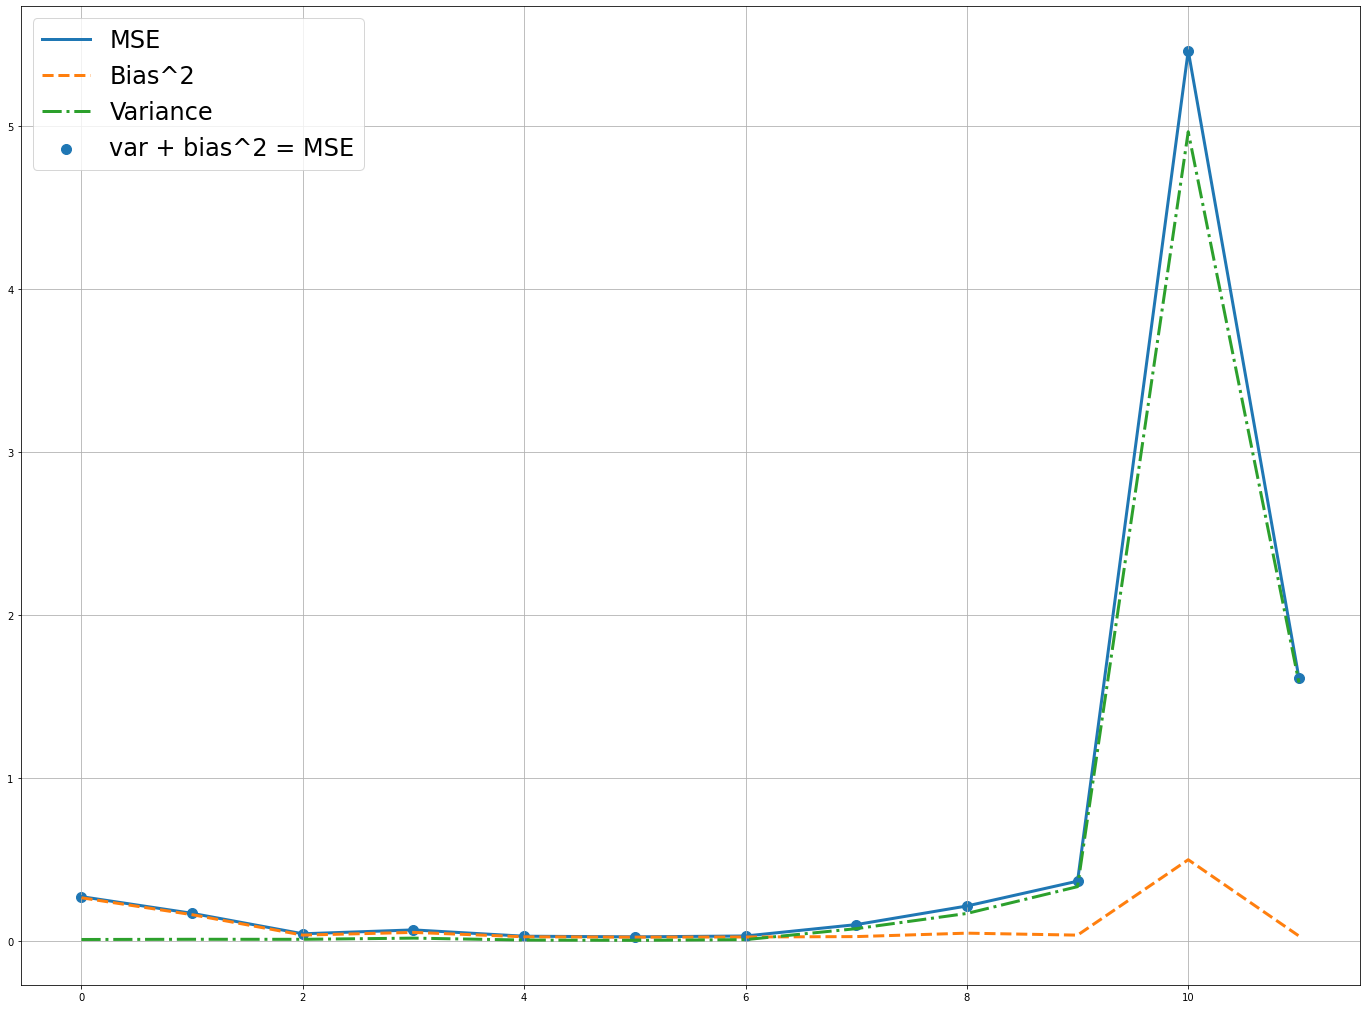

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

np.random.seed(2023)
n = 100
n_boostraps = 200

#Generating data
x = np.linspace(-5, 5, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + noise_coeff * np.random.normal(0, 0.1, x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

p = 12
error_boot = np.empty(p)
bias_boot = np.empty(p)
variance_boot = np.empty(p)
polyvec_boot = np.empty(p)

for deg in range(p):
    
    # Create linear regression object
    regr = make_pipeline(PolynomialFeatures(degree=deg+1), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))

    for i in range(n_boostraps):
        x_boot, y_boot = resample(x_train, y_train)
        
        # Train the model using the training sets
        regr.fit(x_boot, y_boot)
        
        # Make predictions using the testing set
        y_pred[:, i] = regr.predict(x_test).ravel()
    
    error_boot[deg] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias_boot[deg] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance_boot[deg] = np.mean( np.var(y_pred, axis=1, keepdims=True) )

    polyvec_boot[deg] = deg
        

fig, ax = plt.subplots(figsize=(24,18))
ax.plot(polyvec_boot, error_boot, label='MSE', linewidth=3)
ax.plot(polyvec_boot, bias_boot, label='Bias^2', linestyle='dashed', linewidth=3)
ax.plot(polyvec_boot, variance_boot, label='Variance', linestyle='dashdot', linewidth=3)
ax.scatter(polyvec_boot, bias_boot + variance_boot, label= "var + bias^2 = MSE", s=100)
ax.legend(fontsize=24)
ax.grid()
plt.show()

While the results are sensitive to random effects (even the provided code example gives wildly different results with another random seed), it still shows the fundamental relationship between Mean Squared Error, Bias (squared) and variance, shown in the analytical exercise above. 

We can perhaps see a small trend of the bias decreasing with model complexity, while the variance increases, although with extreme overfitting, things might break down at some point (polynomials of higher degree start to not behave well in my case). 

A more instructive plot can be seen below with an artificially low number of points, but illustrating the relationship well. To find the sweet spot regarding model complexity, regularization using for example lasso or ridge is the way forward. 

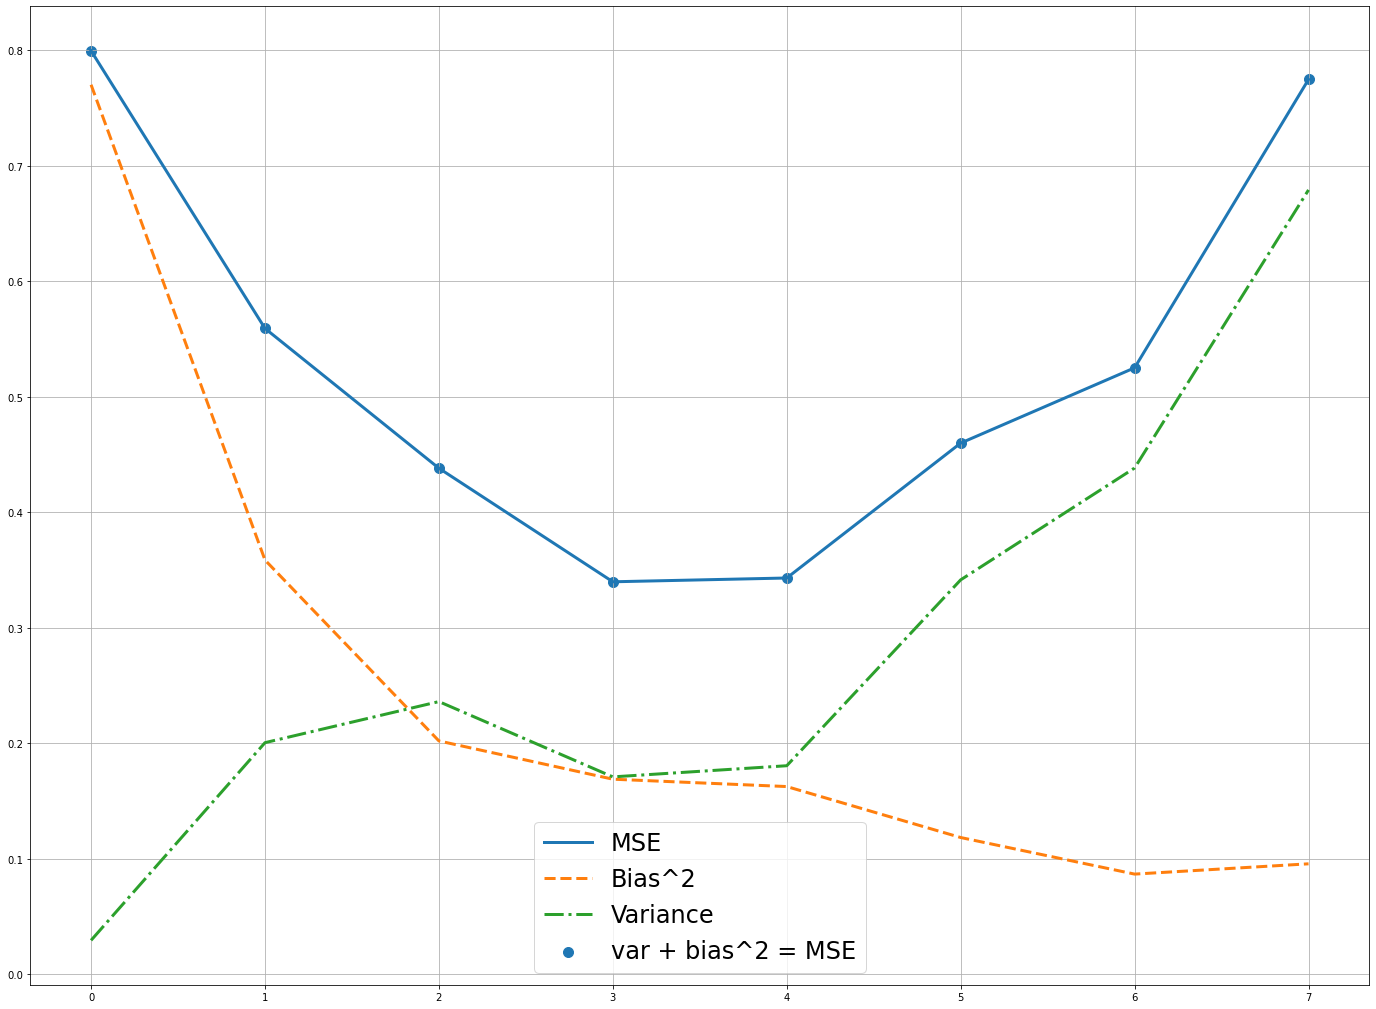

In [3]:
np.random.seed(2023)
n = 10
n_boostraps = 200

#Generating data
x = np.linspace(-5, 5, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + noise_coeff * np.random.normal(0, 0.1, x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

p = 8 #12
error_boot = np.empty(p)
bias_boot = np.empty(p)
variance_boot = np.empty(p)
polyvec_boot = np.empty(p)

for deg in range(p):
    
    # Create linear regression object
    regr = make_pipeline(PolynomialFeatures(degree=deg+1), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))

    for i in range(n_boostraps):
        x_boot, y_boot = resample(x_train, y_train)
        
        # Train the model using the training sets
        regr.fit(x_boot, y_boot)
        
        # Make predictions using the testing set
        y_pred[:, i] = regr.predict(x_test).ravel()
    
    error_boot[deg] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias_boot[deg] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance_boot[deg] = np.mean( np.var(y_pred, axis=1, keepdims=True) )

    polyvec_boot[deg] = deg
        

fig, ax = plt.subplots(figsize=(24,18))
ax.plot(polyvec_boot, error_boot, label='MSE', linewidth=3)
ax.plot(polyvec_boot, bias_boot, label='Bias^2', linestyle='dashed', linewidth=3)
ax.plot(polyvec_boot, variance_boot, label='Variance', linestyle='dashdot', linewidth=3)
ax.scatter(polyvec_boot, bias_boot + variance_boot, label= "var + bias^2 = MSE", s=100)
ax.legend(fontsize=24)
ax.grid()
plt.show()